## Advanced Regression on House Rent Prediction

In [39]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

### Cleaning the Data

In [40]:
# loading the datasets
train_df = pd.read_csv('Data\\train_data.csv')
test_df = pd.read_csv('Data\\test_data.csv')

In [41]:
# peeking the dataset
train_df.head()

,Bedrooms,Paid User,Locality,Property Type,User Type,Prime Location,Other,Price
0,2,N,Patancheru,Residential House,Owner,Y,***carpet area*2500 sqft****status*Ready to Mo...,1.10 Cr
1,2,N,"Ramanthapur, NH 2 2",Apartment,Owner,Y,***carpet area*1007 sqft****status*Ready to Mo...,50 Lac
2,2,N,Malkajgiri,Apartment,Owner,Y,***super area*1045 sqft****status*Ready to Mov...,49 Lac
3,3,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,***super area*1640 sqft****status**\t\t\t\t\t\...,1.06 Cr
4,3,Y,Aminpur,Apartment,Builder,Y,***super area*1039 sqft****status**\t\t\t\t\t\...,46.2 Lac


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 0 to 10761
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Bedrooms        10762 non-null  object
 1   Paid User       10762 non-null  object
 2   Locality        10762 non-null  object
 3   Property Type   10762 non-null  object
 4   User Type       10762 non-null  object
 5   Prime Location  10762 non-null  object
 6   Other           10762 non-null  object
 7   Price           10762 non-null  object
dtypes: object(8)
memory usage: 672.8+ KB


In [43]:
train_df.isnull().sum()

Bedrooms          0
Paid User         0
Locality          0
Property Type     0
User Type         0
Prime Location    0
Other             0
Price             0
dtype: int64

In [44]:
train_df['Other'].iloc[1]

'***carpet area*1007\xa0sqft****status*Ready to Move****floor*1 out of 4 floors***transaction*Resale***furnishing*Semi-Furnished***facing*East***car parking*1 Covered***bathroom*2***balcony*2***ownership*Freehold**'

In [45]:
# Define a function to extract values for each attribute
def extract_property_info(df):
    # Extract information from 'Other' column
    df['carpet area'] = df['Other'].str.extract(r'\*carpet area\*([^*]+)\*')
    df['status'] = df['Other'].str.extract(r'\*status\*([^*]+)\*')
    df['transaction'] = df['Other'].str.extract(r'\*transaction\*([^*]+)\*')
    df['overlooking'] = df['Other'].str.extract(r'\*overlooking\*([^*]+)\*')
    df['facing'] = df['Other'].str.extract(r'\*facing\*([^*]+)\*')
    df['bathroom'] = df['Other'].str.extract(r'\*bathroom\*([^*]+)\*')
    df['balcony'] = df['Other'].str.extract(r'\*balcony\*([^*]+)\*')
    df['furnishing'] = df['Other'].str.extract(r'\*furnishing\*([^*]+)\*')

    # Drop the original 'Other' column
    df.drop(columns=['Other'], inplace=True)

    # Convert numeric columns to numeric type
    numeric_columns = ['carpet area', 'bathroom', 'balcony']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    return df

# Apply the function to train_df and test_df
train_df = extract_property_info(train_df)
test_df = extract_property_info(test_df)

In [46]:
train_df.isnull().sum()

Bedrooms              0
Paid User             0
Locality              0
Property Type         0
User Type             0
Prime Location        0
Price                 0
carpet area       10762
status             3560
transaction           1
overlooking        7731
facing             6121
bathroom            252
balcony            5631
furnishing          250
dtype: int64

In [47]:
train_df.drop(columns=['carpet area', 'overlooking', 'balcony', 'facing', 'status'], inplace=True)
test_df.drop(columns=['carpet area', 'overlooking', 'balcony', 'facing', 'status'], inplace=True)

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 0 to 10761
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        10762 non-null  object 
 1   Paid User       10762 non-null  object 
 2   Locality        10762 non-null  object 
 3   Property Type   10762 non-null  object 
 4   User Type       10762 non-null  object 
 5   Prime Location  10762 non-null  object 
 6   Price           10762 non-null  object 
 7   transaction     10761 non-null  object 
 8   bathroom        10510 non-null  float64
 9   furnishing      10512 non-null  object 
dtypes: float64(1), object(9)
memory usage: 840.9+ KB


<Axes: >

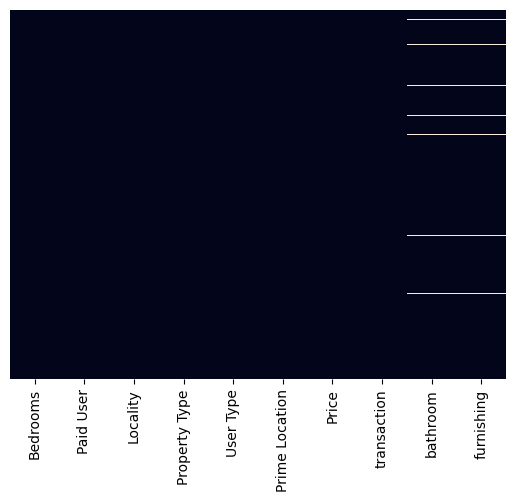

In [49]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

In [50]:
train_df.isnull().sum()

Bedrooms            0
Paid User           0
Locality            0
Property Type       0
User Type           0
Prime Location      0
Price               0
transaction         1
bathroom          252
furnishing        250
dtype: int64

In [51]:
train_df['bathroom'] = train_df['bathroom'].fillna(train_df['bathroom'].mode()[0])
test_df['bathroom'] = test_df['bathroom'].fillna(test_df['bathroom'].mode()[0])
train_df['furnishing'] = train_df['furnishing'].fillna(train_df['furnishing'].mode()[0])
test_df['furnishing'] = test_df['furnishing'].fillna(test_df['furnishing'].mode()[0])

In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 0 to 10761
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        10762 non-null  object 
 1   Paid User       10762 non-null  object 
 2   Locality        10762 non-null  object 
 3   Property Type   10762 non-null  object 
 4   User Type       10762 non-null  object 
 5   Prime Location  10762 non-null  object 
 6   Price           10762 non-null  object 
 7   transaction     10761 non-null  object 
 8   bathroom        10762 non-null  float64
 9   furnishing      10762 non-null  object 
dtypes: float64(1), object(9)
memory usage: 840.9+ KB


In [53]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        2691 non-null   object 
 1   Paid User       2691 non-null   object 
 2   Locality        2691 non-null   object 
 3   Property Type   2691 non-null   object 
 4   User Type       2691 non-null   object 
 5   Prime Location  2691 non-null   object 
 6   Price           2691 non-null   object 
 7   transaction     2691 non-null   object 
 8   bathroom        2691 non-null   float64
 9   furnishing      2691 non-null   object 
dtypes: float64(1), object(9)
memory usage: 210.4+ KB


In [54]:
train_df = train_df.dropna(subset=['transaction']).reset_index(drop=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10761 entries, 0 to 10760
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        10761 non-null  object 
 1   Paid User       10761 non-null  object 
 2   Locality        10761 non-null  object 
 3   Property Type   10761 non-null  object 
 4   User Type       10761 non-null  object 
 5   Prime Location  10761 non-null  object 
 6   Price           10761 non-null  object 
 7   transaction     10761 non-null  object 
 8   bathroom        10761 non-null  float64
 9   furnishing      10761 non-null  object 
dtypes: float64(1), object(9)
memory usage: 840.8+ KB


In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       2691 non-null   object 
 1   Paid User      2691 non-null   object 
 2   Locality       2691 non-null   object 
 3   Property Type  2691 non-null   object 
 4   User Type      2691 non-null   object 
 5   Price          2691 non-null   object 
 6   transaction    2691 non-null   object 
 7   bathroom       2691 non-null   float64
 8   furnishing     2691 non-null   object 
dtypes: float64(1), object(8)
memory usage: 189.3+ KB


### Handling Categorical features

In [55]:
unique_counts = train_df.nunique()
print(unique_counts)

Bedrooms            11
Paid User            2
Locality          1011
Property Type        5
User Type            3
Prime Location       1
Price              571
transaction          2
bathroom            10
furnishing           3
dtype: int64


In [56]:
train_df.drop(columns=['Prime Location'], inplace=True)
test_df.drop(columns=['Prime Location'], inplace=True)

In [57]:
categorical_columns = ['Bedrooms', 'Paid User', 'Property Type', 'User Type', 'transaction', 'bathroom', 'furnishing']

In [58]:
len(categorical_columns)

7

In [ ]:
# function to encode categorical features easily
